<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Василий-Банка» стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [12]:
!pip install scikit-learn -U

Requirement already up-to-date: scikit-learn in c:\users\vasni\anaconda3\lib\site-packages (0.24.2)


In [13]:
!pip install sklearn -U

Requirement already up-to-date: sklearn in c:\users\vasni\anaconda3\lib\site-packages (0.0)


In [14]:
!pip install imblearn -U

Requirement already up-to-date: imblearn in c:\users\vasni\anaconda3\lib\site-packages (0.0)


In [15]:
import sys

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.pipeline import Pipeline, make_pipeline
import random
from imblearn.pipeline import make_pipeline

In [18]:
bank_data = pd.read_csv(r'C:\HOME/Churn.csv')
display(bank_data.head())
display(bank_data.info())
display(bank_data.isna().mean() != 0)
display(bank_data.shape)
display(bank_data.nunique())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure              True
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

(10000, 14)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [19]:
bank_data.sample(n=10, random_state = 99)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7653,7654,15788215,Hsia,535,Spain,Female,30,NaN,122924.75,1,0,0,62390.59,1
7865,7866,15748995,Ifeajuna,691,Spain,Male,30,9.0,0.00,2,0,1,10963.04,0
3226,3227,15796351,Yao,603,Germany,Male,35,1.0,105346.03,2,1,1,130379.50,0
5912,5913,15715414,White,658,France,Female,38,6.0,102895.10,1,0,0,155665.76,0
8237,8238,15737275,Conti,649,France,Male,39,3.0,113096.41,1,1,1,60335.24,0
3004,3005,15706185,Clements,596,Germany,Male,47,5.0,140187.10,2,1,1,174311.30,0
5736,5737,15775116,Anderson,581,France,Male,31,3.0,0.00,2,0,0,89040.61,0
8290,8291,15731267,Rizzo,797,France,Male,37,4.0,75263.70,1,1,0,85801.77,0
9946,9947,15618171,James,669,France,Female,33,9.0,0.00,2,0,1,107221.03,0
7295,7296,15696361,Chung,648,Germany,Male,31,NaN,125681.51,1,0,1,129980.93,0


Первичный анализ данных показывает, что пропущенных значений NaN немного, типы данных правильные. Приведем названия столбов к нижнему регистру.

Данные предоставлены только для трех стран, логично будет сделать категорилизацию по этим данным, предполагаемые зарплаты у всех разные,их столько же, сколько и признаков, это кажется немного странным, возмоэно их тоже можно категорилизвать для более быстрого обучения моделей.

In [20]:
bank_data.columns = bank_data.columns.str.lower()

Проверим уникальный значения по столбцам 

In [21]:
for column in bank_data.columns:
    display(column)
    display(bank_data[column].value_counts(dropna=False))

'rownumber'

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: rownumber, Length: 10000, dtype: int64

'customerid'

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: customerid, Length: 10000, dtype: int64

'surname'

Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Lim            1
Kolesnikov     1
Chuter         1
Asher          1
McEncroe       1
Name: surname, Length: 2932, dtype: int64

'creditscore'

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: creditscore, Length: 460, dtype: int64

'geography'

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

'gender'

Male      5457
Female    4543
Name: gender, dtype: int64

'age'

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64

'tenure'

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

'balance'

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: balance, Length: 6382, dtype: int64

'numofproducts'

1    5084
2    4590
3     266
4      60
Name: numofproducts, dtype: int64

'hascrcard'

1    7055
0    2945
Name: hascrcard, dtype: int64

'isactivemember'

1    5151
0    4849
Name: isactivemember, dtype: int64

'estimatedsalary'

24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: estimatedsalary, Length: 9999, dtype: int64

'exited'

0    7963
1    2037
Name: exited, dtype: int64

В данных 50% респондентов из Франции и по 25% из Испании и Германии. По полу разделение практически равное. В возрасте нет отрицательных значений - это хорошо, данные корректны. Есть 909 пропущенных значение в Tenure, нужно проверить корреляцию с другими признаками, узнать тип этой ошибки и попытаться восстановить.Много людей с нулевым балансом на счете, примерно 1\3 от общей выборки, почти половина пользователей неактивна.

Мультиколлинеарность факторов отсутсвует, возраст и кол-во лет, которые человек является клиентом банка коррелируют, однако ни тот, ни другой нельзя исключить, так как они оба важны в отдельности.

## Исследование задачи

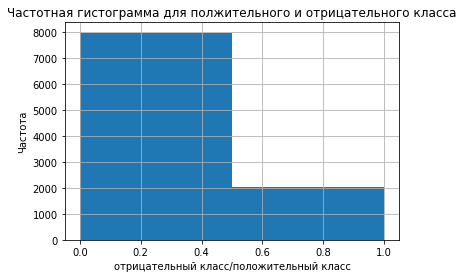

In [22]:
bank_data['exited'].hist(bins = 2)
plt.title('Частотная гистограмма для полжительного и отрицательного класса')
plt.xlabel('отрицательный класс/положительный класс')
plt.ylabel('Частота')
plt.show()

Гистограмма для целевого признака показывает соотношение(дисбаланс) классов.

Есть дисбаланс классов - 7963\2037, ~ 4:1

In [23]:
# bank_data['tenure'] = bank_data['tenure'].fillna(method='bfill')
bank_data['tenure'] = bank_data['tenure'].fillna(0)
cols = ['tenure', 'balance', 'estimatedsalary']
bank_data[cols] = bank_data[cols].round()
bank_data[cols] = bank_data[cols].astype('Int64')

Заполнили столбец методом bfill, следующая строка нужна так как при проверке isna().mean() в этом мтолбце остается 0.001 NaN и на гридсерче выдает ошибку.

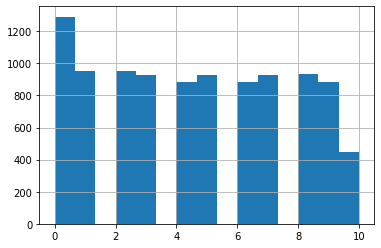

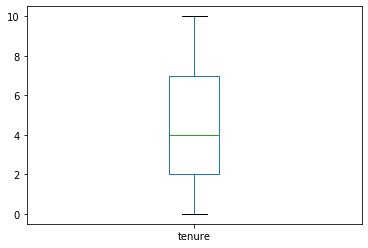

In [24]:
bank_data['tenure'].hist(bins = 15)
plt.figure()
bank_data['tenure'].plot.box()
plt.show()

In [25]:
bank_data['tenure'] = bank_data['tenure'].fillna(random.randint(1, 10))

In [26]:
features_columns = ['creditscore', 'geography_Germany', 'geography_Spain',
       'gender_Male', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary']

Выделил необходимы признаки для обучения модели.

In [27]:
category_col = ['geography', 'gender']
bank_data = pd.get_dummies(bank_data, columns=category_col, drop_first = True)
display(bank_data)

,rownumber,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2,0,1,1,1,101349,1,0,0,0
1,2,15647311,Hill,608,41,1,83808,1,0,1,112543,0,0,1,0
2,3,15619304,Onio,502,42,8,159661,3,1,0,113932,1,0,0,0
3,4,15701354,Boni,699,39,1,0,2,0,0,93827,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125511,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0,2,1,0,96271,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57370,1,1,1,101700,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0,1,0,1,42086,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075,2,1,0,92889,1,1,0,1


In [29]:
features = bank_data[features_columns].astype('int64')
target = bank_data['exited']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=99, stratify=target)

In [30]:
display(features_test.head())
display(features_train.head())

,creditscore,geography_Germany,geography_Spain,gender_Male,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
5253,655,0,1,0,27,9,0,2,0,0,108008
8950,461,0,0,0,35,5,0,1,1,1,54209
2182,665,0,1,1,38,9,0,1,0,1,87413
3846,554,0,0,0,48,7,0,2,1,1,63708
6957,686,0,0,0,44,7,55054,1,1,0,181757


,creditscore,geography_Germany,geography_Spain,gender_Male,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
8169,635,0,0,1,27,3,127010,1,1,0,161910
4869,669,0,0,1,50,4,149714,3,1,1,124872
304,553,0,0,1,33,4,118083,1,0,0,94440
3656,750,0,0,0,37,6,0,1,1,1,117948
3597,796,1,0,0,40,1,99746,1,1,0,177524


In [31]:
display(bank_data.info())
display(bank_data.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
rownumber            10000 non-null int64
customerid           10000 non-null int64
surname              10000 non-null object
creditscore          10000 non-null int64
age                  10000 non-null int64
tenure               10000 non-null Int64
balance              10000 non-null Int64
numofproducts        10000 non-null int64
hascrcard            10000 non-null int64
isactivemember       10000 non-null int64
estimatedsalary      10000 non-null Int64
exited               10000 non-null int64
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
dtypes: Int64(3), int64(8), object(1), uint8(3)
memory usage: 996.2+ KB


None

rownumber            0.0
customerid           0.0
surname              0.0
creditscore          0.0
age                  0.0
tenure               0.0
balance              0.0
numofproducts        0.0
hascrcard            0.0
isactivemember       0.0
estimatedsalary      0.0
exited               0.0
geography_Germany    0.0
geography_Spain      0.0
gender_Male          0.0
dtype: float64

In [32]:
param_grid = { 
    'n_estimators': [est for est in range(1, 100, 10)],
    'max_features': ['auto'],
    'max_depth' : [depth for depth in range(1, 20)],
    'criterion' :['gini'],
    'random_state': [99]
}

In [33]:
rfc = RandomForestClassifier()

In [34]:
%%time
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring = 'f1', cv = 5)
CV_rfc.fit(features_train, target_train)

Wall time: 3min 13s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto'],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91],
                         'random_state': [99]},
             scoring='f1')

In [35]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'auto',
 'n_estimators': 91,
 'random_state': 99}

In [36]:
predict = CV_rfc.predict(features_test)
acc = accuracy_score(target_test, predict)
f1 = f1_score(target_test, predict)
print('Accuracy_score', acc, 'F1_score', f1)

Accuracy_score 0.8664 F1_score 0.5906862745098038


### Вывод

Даже с учетом дисбаланса классов мы имеем довольно высокую точность и допустимое значение f-меры

## Борьба с дисбалансом

Дисбаланс классов определен, отношение отрицательных ответов (0- клиент не уйдет) к положительным (1-клинт уйдет) к 4/1/
Считаю оптимальным воспользоватья техникой upsampling

In [37]:
# def upsample(features, target, repeat):
#     features_zeros = features[target == 0]
#     features_ones = features[target == 1]
#     target_zeros = target[target == 0]
#     target_ones = target[target == 1]

#     features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
#     target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
#     features_upsampled, target_upsampled = shuffle(
#         features_upsampled, target_upsampled, random_state=99)
    
#     return features_upsampled, target_upsampled

In [38]:
# features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [40]:
scaler = StandardScaler()
scaler.fit(features_train) 

StandardScaler()

In [41]:
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 

Данные нормализованы.

In [42]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

In [43]:
kf = KFold(n_splits=5, random_state=99, shuffle=True)

In [44]:
imba_pipeline = make_pipeline(SMOTE(random_state=99), 
                              RandomForestClassifier(n_estimators=100, random_state=99))

In [45]:
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba.fit(features_train, target_train);

In [46]:
predict = grid_imba.predict(features_test)
acc = accuracy_score(target_test, predict)
f1 = f1_score(target_test, predict)
print('Accuracy_score', acc, 'F1_score', f1)

Accuracy_score 0.832 F1_score 0.618874773139746


In [47]:
grid_imba.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__n_estimators': 91,
 'randomforestclassifier__random_state': 99}

In [48]:
# features_train = features_train.astype('int64')
new_pipe = make_pipeline(SMOTE(random_state=99),  RandomForestClassifier(n_estimators=61, random_state=99,max_depth=9,criterion='gini',max_features='auto'))
new_pipe.fit(features_train, target_train)


Pipeline(steps=[('smote', SMOTE(random_state=99)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=9, n_estimators=61,
                                        random_state=99))])

In [49]:
predict = new_pipe.predict(features_test)
acc = accuracy_score(target_test, predict)
f1 = f1_score(target_test, predict)
print('Accuracy_score', acc, 'F1_score', f1)

Accuracy_score 0.8288 F1_score 0.6219081272084805


In [50]:
def model_teacher(model_name):
    model_name.fit(features_train, target_train)
    predict = model_name.predict(features_test)
    acc = accuracy_score(target_test, predict)
    f1 = f1_score(target_test, predict)
    print('Accuracy_score', acc, 'F1_score', f1)
    return model_name

На сбалансированных данных модель показывает более высокую точность и лучшую f-меру

Нужно исследовать другие модели для определения наилучшей <br />
Для исследования возьмем три модели: random forest,naive bayes & logistic regression

In [51]:
gnb = GaussianNB()

In [52]:
gnb_model = model_teacher(gnb)

Accuracy_score 0.8276 F1_score 0.45095541401273886


Этот алгоритм показывает невысокий результат, скорее всего из-за того, что наши признаки связаны между собой в то время как он работает лучше , коргда они независимы 

In [53]:
logModel = LogisticRegression()
param_grid_log =     {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [100, 1000, 2500, 5000]
    }

In [54]:
imba_pipeline = make_pipeline(SMOTE(random_state=99), 
                              LogisticRegression(random_state=99))

In [55]:
new_params = {'logisticregression__' + key: param_grid_log[key] for key in param_grid_log}
lr = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
#lr.fit(features_train, target_train)

In [56]:
%%time
lr.fit(features_train, target_train)

Wall time: 47.4 s


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=99)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=99))]),
             param_grid={'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logisticregression__max_iter': [100, 1000, 2500,
                                                          5000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']},
             return_train_scor

In [57]:
predict = lr.predict(features_test)
acc = accuracy_score(target_test, predict)
f1 = f1_score(target_test, predict)
print('Accuracy_score', acc, 'F1_score', f1)

Accuracy_score 0.7096 F1_score 0.4901685393258427


## Тестирование модели

In [58]:
def test_model(model):
    predict = model.predict(features_test)
    acc = accuracy_score(target_test, predict)
    f1 = f1_score(target_test, predict)
    probabilities = model.predict_proba(features_test)
    probabilities = probabilities[:, 1]
    auc_roc = roc_auc_score(target_test, probabilities)
    print('Accuracy_score', acc, 'F1_score', f1, 'auc_roc', auc_roc)
    return acc, f1, auc_roc



In [59]:
acc_rfc, f1_rfc, auc_roc_rfc = test_model(grid_imba)

Accuracy_score 0.832 F1_score 0.618874773139746 auc_roc 0.8624122894873689


In [60]:
acc_gnb, f1_gnb, auc_roc_gnb = test_model(gnb)

Accuracy_score 0.8276 F1_score 0.45095541401273886 auc_roc 0.7893901732649575


In [61]:
acc_lr, f1_lr, auc_roc_lr = test_model(lr)

Accuracy_score 0.7096 F1_score 0.4901685393258427 auc_roc 0.7630575309916234


In [62]:
df = pd.DataFrame({
    'model': ['RandomForestClassifier', 'GaussianNB', 'LogisticRegression'],
    'accuracy': [acc_rfc, f1_rfc, auc_roc_rfc],
    'f1_score': [acc_gnb, f1_gnb, auc_roc_gnb],
    'auc_roc_score': [acc_lr, f1_lr, auc_roc_lr]
})


df = df.set_index('model').round(2)

display(df)

,accuracy,f1_score,auc_roc_score
model,,,
RandomForestClassifier,0.83,0.83,0.71
GaussianNB,0.62,0.45,0.49
LogisticRegression,0.86,0.79,0.76


### Вывод 

По результатам тестирования лучшей является модель случайного леса.

## Общий вывод

В результате проверки эффективности моделей на приведенных данных случайный лес оказался наилучшим и показал резуьтаты которые удовлетворяют заявленным границам.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*